# Assignment 3

## Part 1

In [1]:
# Import relevant libraries
import os
import sys
print('Python: {}'.format(sys.version))

import scipy
print('scipy: {}'.format(scipy.__version__))

import numpy as np
print('numpy: {}'.format(np.__version__))

import pandas as pd
print('pandas: {}'.format(pd.__version__))

import sklearn
print('sklearn: {}'.format(sklearn.__version__))

print("Hello World!")

Python: 3.8.8 (default, Feb 24 2021, 15:54:32) [MSC v.1928 64 bit (AMD64)]
scipy: 1.7.1
numpy: 1.19.2
pandas: 1.1.3
sklearn: 0.24.2
Hello World!


In [2]:
#Function to load the data
def loadData(path,filename):
    try:
             files = os.listdir(path)
             for f in files:
                 if f == filename:
                     data = pd.read_csv(os.path.join(path,f))
                     return data
            
    except Exception as ex:
           print ("-----------------------------------------------------------------------")
           template = "An exception of type {0} occurred. Arguments:\n{1!r}"
           message = template.format(type(ex).__name__, ex.args)
           print (message)

In [3]:
# Deduce the metrics
from sklearn.metrics import accuracy_score, confusion_matrix,ConfusionMatrixDisplay

def metrics(test,pred,modelname):
    try:
        print("Number of mislabeled points out of a total %d points : %d" % (len(test), (test != pred).sum()))
        
        # Accuracy
        acc = accuracy_score(test, pred)
        print('Accuracy of the {:s} model: {:f}'.format(modelname,acc))
        
        # Confusion matrix
        cm=confusion_matrix(test,pred)
        disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                                      display_labels=['Iris-setosa','Iris-versicolor','Iris-virginica'])
        _=disp.plot() 
        disp.ax_.set(title=modelname)
        print()
            
    except Exception as ex:
           print ("-----------------------------------------------------------------------")
           template = "An exception of type {0} occurred. Arguments:\n{1!r}"
           message = template.format(type(ex).__name__, ex.args)
           print (message)

In [4]:
# Read the file
path = r'C:\Users\pmspr\Documents\HS\MS\Sem 6\EECS 658\Data'
filename = "iris.csv"
data = loadData(path,filename)
display(data)

X = data
y = data.pop('class')
y_asis = y

# Encode the label
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(y)

print('Classes of the label:')
print(le.classes_)

y = list(le.transform(y))

,sepal-length,sepal-width,petal-length,petal-width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


Classes of the label:
['Iris-setosa' 'Iris-versicolor' 'Iris-virginica']


In [5]:
# Split the data
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=1)

#Derive two folds for cross validation
X_train1 = X_train; y_train1 = y_train
X_test1 = X_test; y_test1 = y_test

X_train2 = X_test; y_train2 = y_test
X_test2 = X_train; y_test2 = y_train

print('Number of samples in fold1:{}'.format(len(X_train1)))
print('Number of samples in fold2:{}'.format(len(X_train2)))

Number of samples in fold1:75
Number of samples in fold2:75


Number of mislabeled points out of a total 150 points : 5
Accuracy of the Linear Regression model: 0.966667



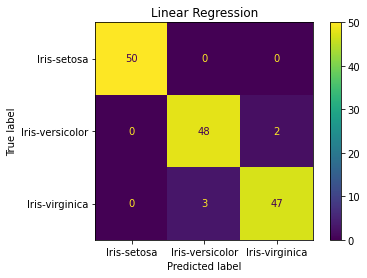

In [6]:
# Model-1-Linear regression
from sklearn.linear_model import LinearRegression
m1 = LinearRegression()

# fold1
clf1 = m1.fit(X_train1,y_train1)
y_pred1 = clf1.predict(X_test1)

# fold2
clf1 = m1.fit(X_train2,y_train2)
y_pred2 = clf1.predict(X_test2)

# Inverse transform
y_raw   = [*y_pred1, *y_pred2]
y_predr = le.inverse_transform([round(x) for x in [*y_pred1, *y_pred2]])
y_testr = le.inverse_transform([*y_test1, *y_test2])

# Metrics
metrics(y_testr,y_predr,'Linear Regression')

# Test
with pd.ExcelWriter('test.xlsx') as writer:
    pd.DataFrame({'actual' : y_testr,'pred' : y_predr, 'raw' : y_raw}).to_excel(writer,sheet_name='linearReg',index=False)

Number of mislabeled points out of a total 150 points : 5
Accuracy of the Polynomial Regression with degree2 model: 0.966667



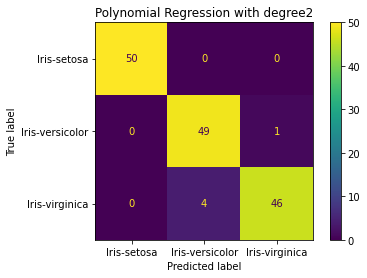

In [7]:
# Model-2-Polynomial regression with degree 2
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline

# Create a pipeline 
# step1 - Create polynomial features
# step2 - Use linear regression
m2 = Pipeline([('poly', PolynomialFeatures(degree=2)),
                  ('linear', LinearRegression(fit_intercept=False))])

# fold1
clf2 = m2.fit(X_train1,y_train1)
y_pred1 = clf2.predict(X_test1)

# fold2
clf2 = m2.fit(X_train2,y_train2)
y_pred2 = clf2.predict(X_test2)

# Inverse transform
y_raw   = [*y_pred1, *y_pred2]
y_predr = [round(x) for x in [*y_pred1, *y_pred2]]
y_predr = le.inverse_transform([2 if v >= 3 else 0 if v < 0 else v for v in y_predr])
y_testr = le.inverse_transform([*y_test1, *y_test2])

# Metrics
metrics(y_testr,y_predr, 'Polynomial Regression with degree2')

# Test 
with pd.ExcelWriter('test.xlsx', mode='a') as writer:
    pd.DataFrame({'actual' : y_testr, 'pred' : y_predr,'raw' : y_raw}).to_excel(writer,sheet_name='PolyReg2',index=False)

Number of mislabeled points out of a total 150 points : 13
Accuracy of the Polynomial Regression with degree3 model: 0.913333



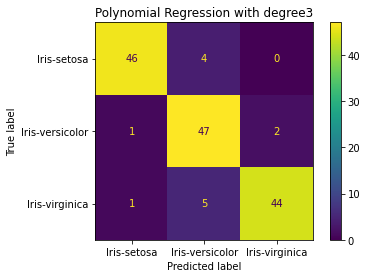

In [8]:
# Model-3-Polynomial regression with degree 3
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline

# Create a pipeline 
# step1 - Create polynomial features
# step2 - Use linear regression
m3 = Pipeline([('poly', PolynomialFeatures(degree=3)),
                  ('linear', LinearRegression(fit_intercept=False))])

# fold1
clf3 = m3.fit(X_train1,y_train1)
y_pred1 = clf3.predict(X_test1)

# fold2
clf3 = m3.fit(X_train2,y_train2)
y_pred2 = clf3.predict(X_test2)

# Inverse transform
y_raw   = [*y_pred1, *y_pred2]
y_predr = [round(x) for x in [*y_pred1, *y_pred2]]
y_predr = le.inverse_transform([2 if v >= 3 else 0 if v < 0 else v for v in y_predr])
y_testr = le.inverse_transform([*y_test1, *y_test2])

# Metrics
metrics(y_testr,y_predr, 'Polynomial Regression with degree3')

# Test 
with pd.ExcelWriter('test.xlsx', mode='a') as writer:
    pd.DataFrame({'actual' : y_testr, 'pred' : y_predr,'raw' : y_raw}).to_excel(writer,sheet_name='PolyReg3',index=False)

Number of mislabeled points out of a total 150 points : 6
Accuracy of the Naive Bayes model: 0.960000



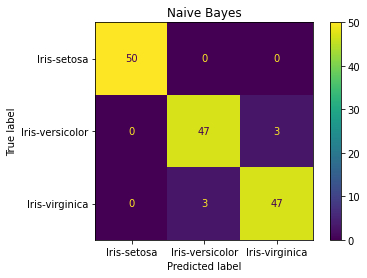

In [9]:
# Model-4-Naive Bayesian classifier
from sklearn.naive_bayes import GaussianNB
m4 = GaussianNB()
#clf4 = gnb.fit(X_train, y_train)

# fold1
clf4 = m4.fit(X_train1,y_train1)
y_pred1 = clf4.predict(X_test1)

# fold2
clf4 = m4.fit(X_train2,y_train2)
y_pred2 = clf4.predict(X_test2)

# Inverse transform
y_raw   = [*y_pred1, *y_pred2]
#y_predr = [round(x) for x in [*y_pred1, *y_pred2]]
y_predr = le.inverse_transform(y_raw)
y_testr = le.inverse_transform([*y_test1, *y_test2])

# Metrics
metrics(y_testr,y_predr, 'Naive Bayes')

# Test 
with pd.ExcelWriter('test.xlsx', mode='a') as writer:
    pd.DataFrame({'actual' : y_testr, 'pred' : y_predr,'raw' : y_raw}).to_excel(writer,sheet_name='NaiveBayes',index=False)

Number of mislabeled points out of a total 150 points : 4
Accuracy of the K Neighbour model: 0.973333



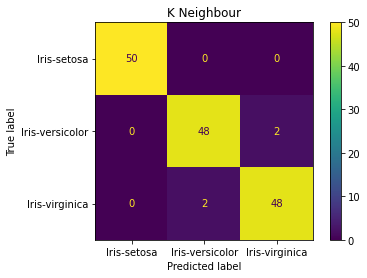

In [10]:
# Model-5-K-Neighbors classifier
from sklearn.neighbors import KNeighborsClassifier

m5 = KNeighborsClassifier(n_neighbors=10)

# fold1
clf5 = m5.fit(X_train1,y_train1)
y_pred1 = clf5.predict(X_test1)

# fold2
clf5 = m5.fit(X_train2,y_train2)
y_pred2 = clf5.predict(X_test2)

# Inverse transform
y_raw   = [*y_pred1, *y_pred2]
#y_predr = [round(x) for x in [*y_pred1, *y_pred2]]
y_predr = le.inverse_transform(y_raw)
y_testr = le.inverse_transform([*y_test1, *y_test2])

# Metrics
metrics(y_testr,y_predr, 'K Neighbour')

# Test 
with pd.ExcelWriter('test.xlsx', mode='a') as writer:
    pd.DataFrame({'actual' : y_testr, 'pred' : y_predr,'raw' : y_raw}).to_excel(writer,sheet_name='KNN',index=False)

Number of mislabeled points out of a total 150 points : 4
Accuracy of the Linear Discriminant Analysis model: 0.973333



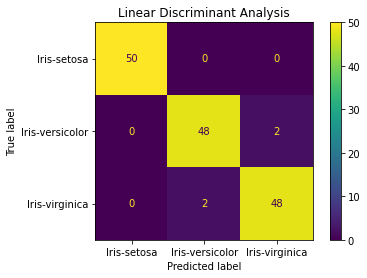

In [11]:
# Model-6-K-LDA (LinearDiscriminantAnalysis) classifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

m6 = LinearDiscriminantAnalysis()

# fold1
clf6 = m6.fit(X_train1,y_train1)
y_pred1 = clf6.predict(X_test1)

# fold2
clf6 = m6.fit(X_train2,y_train2)
y_pred2 = clf6.predict(X_test2)

# Inverse transform
y_raw   = [*y_pred1, *y_pred2]
#y_predr = [round(x) for x in [*y_pred1, *y_pred2]]
y_predr = le.inverse_transform(y_raw)
y_testr = le.inverse_transform([*y_test1, *y_test2])

# Metrics
metrics(y_testr,y_predr, 'Linear Discriminant Analysis')

# Test 
with pd.ExcelWriter('test.xlsx', mode='a') as writer:
    pd.DataFrame({'actual' : y_testr, 'pred' : y_predr,'raw' : y_raw}).to_excel(writer,sheet_name='LDA',index=False)

Number of mislabeled points out of a total 150 points : 6
Accuracy of the Quadratic Discriminant Analysis model: 0.960000



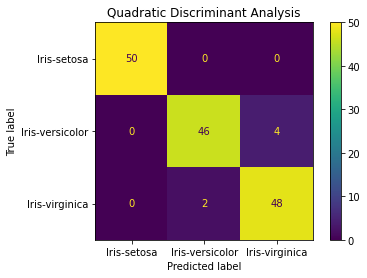

In [12]:
# Model-7-K-QDA (QuadraticDiscriminantAnalysis) classifier
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

m7 = QuadraticDiscriminantAnalysis()

# fold1
clf7 = m7.fit(X_train1,y_train1)
y_pred1 = clf7.predict(X_test1)

# fold2
clf7 = m7.fit(X_train2,y_train2)
y_pred2 = clf7.predict(X_test2)

# Inverse transform
y_raw   = [*y_pred1, *y_pred2]
#y_predr = [round(x) for x in [*y_pred1, *y_pred2]]
y_predr = le.inverse_transform(y_raw)
y_testr = le.inverse_transform([*y_test1, *y_test2])

# Metrics
metrics(y_testr,y_predr, 'Quadratic Discriminant Analysis')

# Test 
with pd.ExcelWriter('test.xlsx', mode='a') as writer:
    pd.DataFrame({'actual' : y_testr, 'pred' : y_predr,'raw' : y_raw}).to_excel(writer,sheet_name='QDA',index=False)

Number of mislabeled points out of a total 150 points : 3
Accuracy of the Support Vector Machines - Linear SVC model: 0.980000



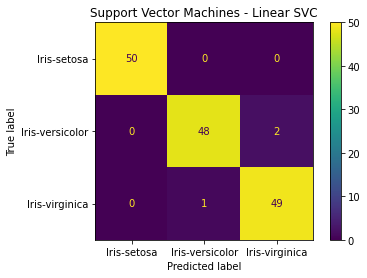

In [41]:
# Model-8-Support Vector Machine - Linear SVC
from sklearn.svm import SVC
m8 = SVC(gamma=.1, kernel='linear', probability=True)

# fold1
clf8 = m8.fit(X_train1,y_train1)
y_pred1 = clf8.predict(X_test1)

# fold2
clf8 = m8.fit(X_train2,y_train2)
y_pred2 = clf8.predict(X_test2)

# Inverse transform
y_raw   = [*y_pred1, *y_pred2]
y_predr = le.inverse_transform(y_raw)
y_testr = le.inverse_transform([*y_test1, *y_test2])

# Metrics
metrics(y_testr,y_predr, 'Support Vector Machines - Linear SVC')

# Test 
with pd.ExcelWriter('test.xlsx', mode='a') as writer:
    pd.DataFrame({'actual' : y_testr, 'pred' : y_predr,'raw' : y_raw}).to_excel(writer,sheet_name='SVM',index=False)

Number of mislabeled points out of a total 150 points : 11
Accuracy of the Decision Tree Classifier model: 0.926667



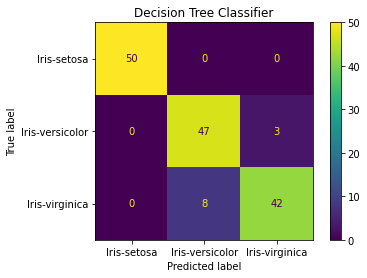

In [42]:
# Model-9-Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier
m9 = DecisionTreeClassifier(max_depth=4)

# fold1
clf9 = m9.fit(X_train1,y_train1)
y_pred1 = clf9.predict(X_test1)

# fold2
clf9 = m9.fit(X_train2,y_train2)
y_pred2 = clf9.predict(X_test2)

# Inverse transform
y_raw   = [*y_pred1, *y_pred2]
y_predr = le.inverse_transform(y_raw)
y_testr = le.inverse_transform([*y_test1, *y_test2])

# Metrics
metrics(y_testr,y_predr, 'Decision Tree Classifier')

# Test 
with pd.ExcelWriter('test.xlsx', mode='a') as writer:
    pd.DataFrame({'actual' : y_testr, 'pred' : y_predr,'raw' : y_raw}).to_excel(writer,sheet_name='DTC',index=False)

Number of mislabeled points out of a total 150 points : 8
Accuracy of the Random Forest Classifier model: 0.946667



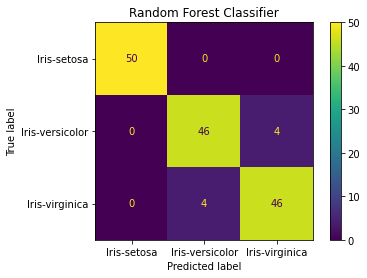

In [7]:
# Model-10-Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier

# parameters
n_estimators = 40

m10 = RandomForestClassifier(max_depth=None, random_state=0, n_estimators=n_estimators, max_features='log2')

# fold1
clf10 = m10.fit(X_train1,y_train1)
y_pred1 = clf10.predict(X_test1)

# fold2
clf10 = m10.fit(X_train2,y_train2)
y_pred2 = clf10.predict(X_test2)

# Inverse transform
y_raw   = [*y_pred1, *y_pred2]
y_predr = le.inverse_transform(y_raw)
y_testr = le.inverse_transform([*y_test1, *y_test2])

# Metrics
metrics(y_testr,y_predr, 'Random Forest Classifier')

# Test 
with pd.ExcelWriter('test.xlsx', mode='a') as writer:
    pd.DataFrame({'actual' : y_testr, 'pred' : y_predr,'raw' : y_raw}).to_excel(writer,sheet_name='RFDTC',index=False)

Number of mislabeled points out of a total 150 points : 7
Accuracy of the Extra tree Classifier model: 0.953333



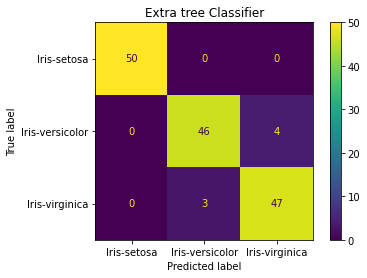

In [52]:
# Model-11-Extra trees Classifier
from sklearn.ensemble import ExtraTreesClassifier

# parameters
n_estimators = 40

m11 = ExtraTreesClassifier(max_depth=None, random_state=0, n_estimators=n_estimators, max_features='log2')

# fold1
clf11 = m11.fit(X_train1,y_train1)
y_pred1 = clf11.predict(X_test1)

# fold2
clf11 = m11.fit(X_train2,y_train2)
y_pred2 = clf11.predict(X_test2)

# Inverse transform
y_raw   = [*y_pred1, *y_pred2]
y_predr = le.inverse_transform(y_raw)
y_testr = le.inverse_transform([*y_test1, *y_test2])

# Metrics
metrics(y_testr,y_predr, 'Extra tree Classifier')

# Test 
with pd.ExcelWriter('test.xlsx', mode='a') as writer:
    pd.DataFrame({'actual' : y_testr, 'pred' : y_predr,'raw' : y_raw}).to_excel(writer,sheet_name='EDTC',index=False)

C:\ProgramData\Anaconda2\envs\P37\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\ProgramData\Anaconda2\envs\P37\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(


Number of mislabeled points out of a total 150 points : 4
Accuracy of the Multi layer perceptron Classifier model: 0.973333



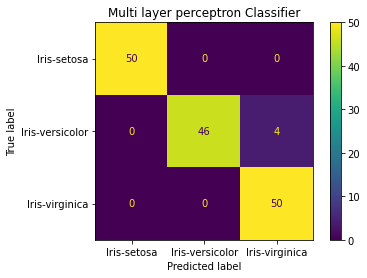

In [60]:
# Model-12-MLP classifier
from sklearn.neural_network import MLPClassifier

m12 = MLPClassifier(random_state=1, max_iter=400)

# fold1
clf12 = m12.fit(X_train1,y_train1)
y_pred1 = clf12.predict(X_test1)

# fold2
clf12 = m12.fit(X_train2,y_train2)
y_pred2 = clf12.predict(X_test2)

# Inverse transform
y_raw   = [*y_pred1, *y_pred2]
y_predr = le.inverse_transform(y_raw)
y_testr = le.inverse_transform([*y_test1, *y_test2])

# Metrics
metrics(y_testr,y_predr, 'Multi layer perceptron Classifier')

# Test 
with pd.ExcelWriter('test.xlsx', mode='a') as writer:
    pd.DataFrame({'actual' : y_testr, 'pred' : y_predr,'raw' : y_raw}).to_excel(writer,sheet_name='MLP',index=False)

## Part 2

Number of samples in fold1:1437
Number of samples in fold2:360
[START] Pre-training step:
>> Epoch 1 finished 	RBM Reconstruction error 2.740666
>> Epoch 2 finished 	RBM Reconstruction error 1.805594
>> Epoch 3 finished 	RBM Reconstruction error 1.432523
>> Epoch 4 finished 	RBM Reconstruction error 1.274614
>> Epoch 5 finished 	RBM Reconstruction error 1.127715
>> Epoch 6 finished 	RBM Reconstruction error 1.016233
>> Epoch 7 finished 	RBM Reconstruction error 0.931797
>> Epoch 8 finished 	RBM Reconstruction error 0.904623
>> Epoch 9 finished 	RBM Reconstruction error 0.891258
>> Epoch 10 finished 	RBM Reconstruction error 0.790757
>> Epoch 1 finished 	RBM Reconstruction error 2.880171
>> Epoch 2 finished 	RBM Reconstruction error 1.491411
>> Epoch 3 finished 	RBM Reconstruction error 1.120919
>> Epoch 4 finished 	RBM Reconstruction error 0.921536
>> Epoch 5 finished 	RBM Reconstruction error 0.763747
>> Epoch 6 finished 	RBM Reconstruction error 0.667087
>> Epoch 7 finished 	RBM Reco

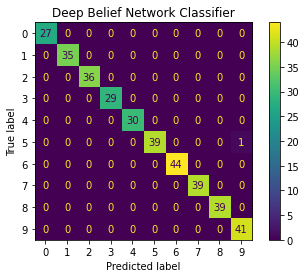

In [8]:
# Deep-belief-network
np.random.seed(1337)  # for reproducibility
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from dbn import SupervisedDBNClassification

# Loading dataset
digits = load_digits()
X, Y = digits.data, digits.target

# Data scaling
X = (X / 16).astype(np.float32)

# Splitting data
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

print('Number of samples in fold1:{}'.format(len(X_train)))
print('Number of samples in fold2:{}'.format(len(X_test)))

# Training
classifier = SupervisedDBNClassification(hidden_layers_structure=[256, 256],
                                         learning_rate_rbm=0.05,
                                         learning_rate=0.1,
                                         n_epochs_rbm=10,
                                         n_iter_backprop=100,
                                         batch_size=32,
                                         activation_function='relu',
                                         dropout_p=0.2)


# Fit
classifier.fit(X_train, Y_train)

# Save the model
classifier.save('model.pkl')

# Restore it
classifier = SupervisedDBNClassification.load('model.pkl')

# Test
Y_pred = classifier.predict(X_test)
print('Done.\nAccuracy: %f' % accuracy_score(Y_test, Y_pred))

# Metrics
print("Number of mislabeled points out of a total %d points : %d" % (len(Y_test), (Y_test != Y_pred).sum()))
        
# Accuracy
acc = accuracy_score(Y_test, Y_pred)
print('Accuracy of the {:s} model: {:f}'.format('Deep Belief Network Classifier',acc))

# Confusion matrix
cm=confusion_matrix(Y_test, Y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=['0','1','2','3','4','5','6','7','8','9'])
_=disp.plot() 
disp.ax_.set(title='Deep Belief Network Classifier')
print()

# Test 
with pd.ExcelWriter('test.xlsx', mode='a') as writer:
    pd.DataFrame({'actual' : Y_test, 'pred' : Y_pred,'raw' : Y_pred}).to_excel(writer,sheet_name='DBN',index=False)